In [2]:
import platform
print(platform.python_version())

3.8.5


In [3]:
import graspy

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [4]:
from graspy.simulations import er_nm, er_np

n = 50
m = 250
p = 0.3

np.random.seed(1)
G1 = er_np(n=n, p=p)
G2 = er_nm(n=n, m=m)

In [6]:
G1.shape

(50, 50)

<AxesSubplot:title={'center':'ER-NM(50, 250) Simulation'}>

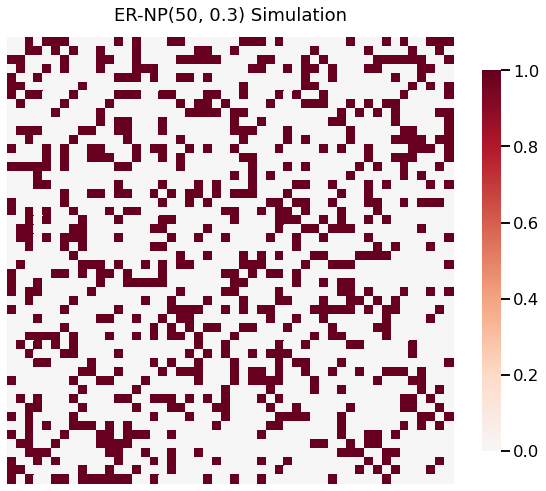

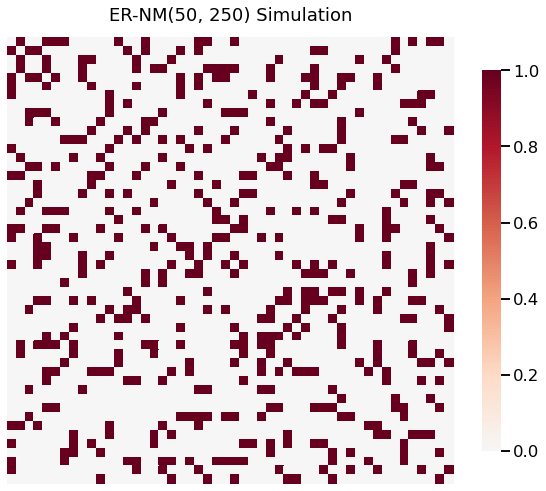

In [4]:
from graspy.plot import heatmap

heatmap(G1, title = 'ER-NP(50, 0.3) Simulation')
heatmap(G2, title = 'ER-NM(50, 250) Simulation')

In [5]:
wt = np.random.normal
wtargs = dict(loc=0, scale=1)

G1 = er_np(n=50, p=0.2, wt=wt, wtargs=wtargs)

<AxesSubplot:title={'center':'ER-NP(50, 0.2) with N(0,1) Weights Simulation'}>

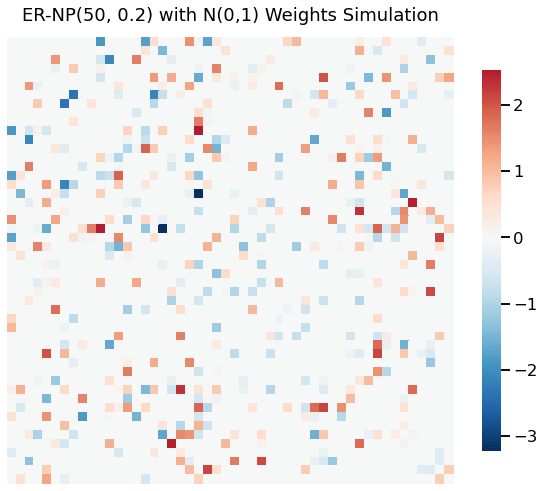

In [6]:
heatmap(G1, title = 'ER-NP(50, 0.2) with N(0,1) Weights Simulation')

In [7]:
import graspy

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [8]:
from graspy.simulations import sbm

n = [50, 50]
p = [[0.5, 0.2],
     [0.2, 0.05]]

np.random.seed(1)
G = sbm(n=n, p=p)

<AxesSubplot:title={'center':'SBM Simulation'}>

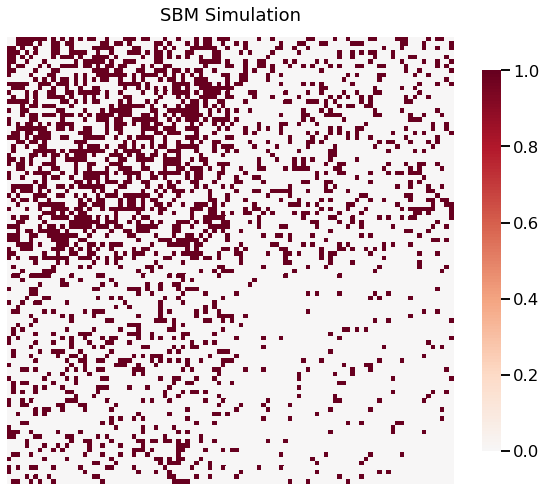

In [9]:
from graspy.plot import heatmap

heatmap(G, title ='SBM Simulation')

In [10]:
from numpy.random import normal, poisson

n = [50, 50]
p = [[0.5, 0.2],
     [0.2, 0.05]]
wt = [[normal, poisson],
      [poisson, normal]]
wtargs = [[dict(loc=3, scale=1), dict(lam=5)],
          [dict(lam=5), dict(loc=3, scale=1)]]

G = sbm(n=n, p=p, wt=wt, wtargs=wtargs)

<AxesSubplot:title={'center':'Weighted SBM Simulation'}>

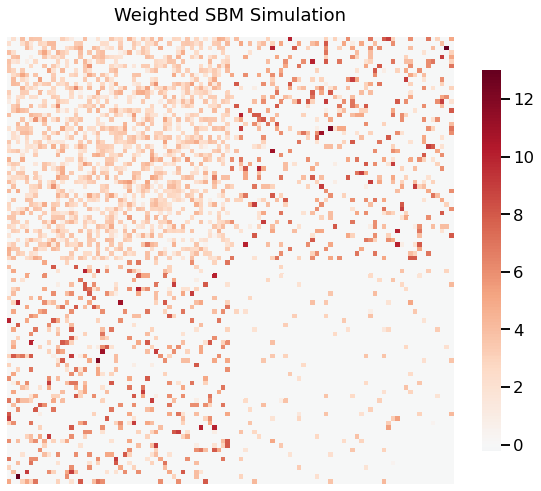

In [11]:
heatmap(G, title='Weighted SBM Simulation')

In [12]:
import graspy

import numpy as np
%matplotlib inline

In [13]:
from graspy.simulations import rdpg

# Create a latent position matrix
X = np.full((100, 2), 0.5)
print(X @ X.T)

[[0.5 0.5 0.5 ... 0.5 0.5 0.5]
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]
 ...
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]]


In [14]:
A = rdpg(X)

<AxesSubplot:title={'center':'ER_NP(100, 0.5) Using RDPG'}>

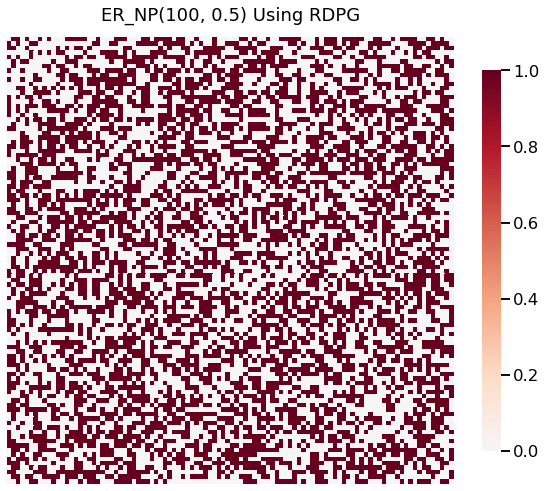

In [15]:
from graspy.plot import heatmap

heatmap(A, title='ER_NP(100, 0.5) Using RDPG')

<AxesSubplot:title={'center':'2-block SBM as RDPG'}>

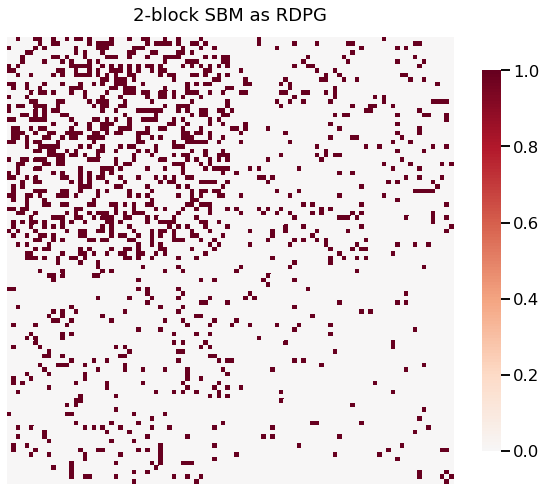

In [16]:
X = np.array([[0.5, 0.2, 0.2]] * 50 + [[0.1, 0.1, 0.1]] * 50)
A_rdpg = rdpg(X, loops=False)
heatmap(A_rdpg, title='2-block SBM as RDPG')

<AxesSubplot:title={'center':'SBM Simulation'}>

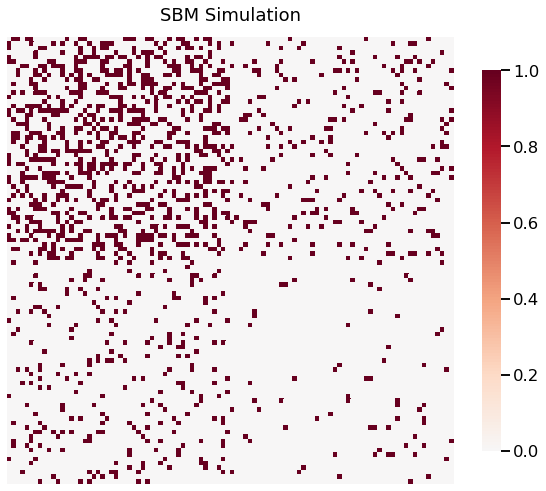

In [18]:
from graspy.simulations import sbm
n = [50, 50]
p = [[0.33, 0.09], [0.09, 0.03]]

A_sbm = sbm(n, p)
heatmap(A_sbm, title = 'SBM Simulation')

In [19]:
import graspy
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [20]:
from graspy.simulations import er_corr
n = 50
r = 0.3
p = 0.5

np.random.seed(2)
G1, G2 = er_corr(n, p, r, directed = False, loops = False)

<AxesSubplot:title={'center':'Correlated ER Simulation Graph 2'}>

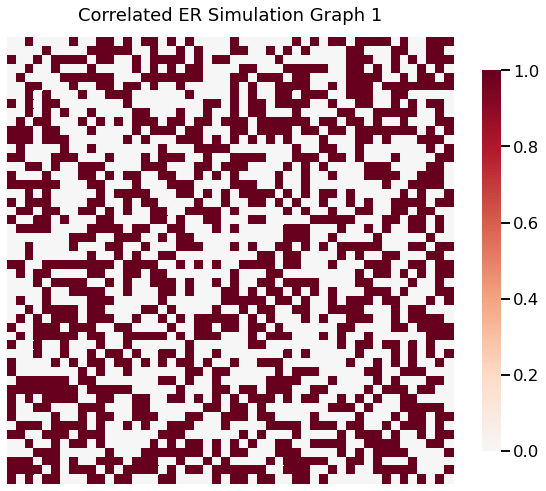

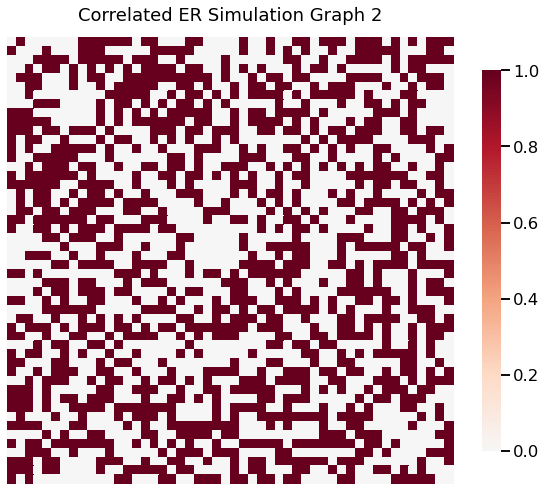

In [21]:
from graspy.plot import heatmap
heatmap(G1, title = 'Correlated ER Simulation Graph 1')
heatmap(G2, title = 'Correlated ER Simulation Graph 2')

In [22]:
from graspy.simulations.rdpg_corr import rdpg_corr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_context('talk')

In [23]:
np.random.seed(1234)
X = np.array([[0.5, 0.2, 0.2]] * 50 + [[0.1, 0.1, 0.1]] * 50)
Y = None
r = 0.3

G1, G2 = rdpg_corr(X, Y, r, rescale=False, directed=False, loops=False)

In [24]:
X @ X.T

array([[0.33, 0.33, 0.33, ..., 0.09, 0.09, 0.09],
       [0.33, 0.33, 0.33, ..., 0.09, 0.09, 0.09],
       [0.33, 0.33, 0.33, ..., 0.09, 0.09, 0.09],
       ...,
       [0.09, 0.09, 0.09, ..., 0.03, 0.03, 0.03],
       [0.09, 0.09, 0.09, ..., 0.03, 0.03, 0.03],
       [0.09, 0.09, 0.09, ..., 0.03, 0.03, 0.03]])

Difference rate is  0.1438


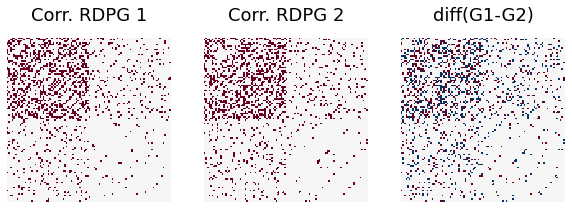

In [25]:
from graspy.plot import heatmap

fig, axs = plt.subplots(1, 3, figsize=(10, 5))
heatmap(G1, ax=axs[0], cbar=False, title = 'Corr. RDPG 1')
heatmap(G2, ax=axs[1], cbar=False, title = 'Corr. RDPG 2')
heatmap(G1-G2, ax=axs[2], cbar=False, title='diff(G1-G2)')
ndim=G1.shape[0]
print("Difference rate is ", np.sum(abs(G1-G2))/(ndim*ndim))

Difference rate with sbm_corr function is  0.145


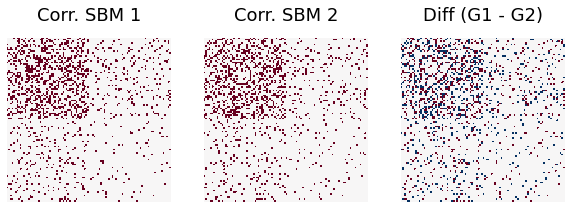

In [27]:
from graspy.simulations import sbm_corr

np.random.seed(123)
directed = False
loops = False
n_per_block = 50
n_blocks = 2
block_members = np.array(n_blocks * [n_per_block])
n_verts = block_members.sum()
rho = .3
block_probs = np.array([[0.33, 0.09], [0.09, 0.03]])

A1, A2 = sbm_corr(block_members, block_probs, rho, directed=directed, loops=loops)
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
heatmap(A1, ax=axs[0], cbar=False, title="Corr. SBM 1")
heatmap(A2, ax=axs[1], cbar=False, title="Corr. SBM 2")
heatmap(A1 - A2, ax=axs[2], cbar=False, title="Diff (G1 - G2)")

ndim=G1.shape[0]
print("Difference rate with sbm_corr function is ", np.sum(abs(A1-A2))/(ndim*ndim))

Difference rate when correlation = -0.5 is  0.7332


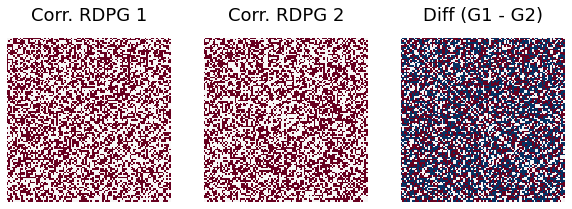

In [28]:
X = np.random.dirichlet([10, 10], size=100)
Y = None

np.random.seed(12345)
r = -0.5

G1, G2 = rdpg_corr(X, Y, r, rescale=False, directed=False, loops=False)


fig, axs = plt.subplots(1, 3, figsize=(10, 5))
heatmap(G1, ax=axs[0], cbar=False, title="Corr. RDPG 1")
heatmap(G2, ax=axs[1], cbar=False, title="Corr. RDPG 2")
heatmap(G1 - G2, ax=axs[2], cbar=False, title="Diff (G1 - G2)")
ndim=G1.shape[0]
print("Difference rate when correlation = -0.5 is ", np.sum(abs(G1-G2))/(ndim*ndim))

Difference rate when correlation =0.3 is  0.3544


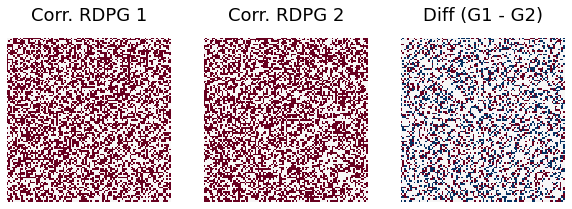

In [29]:
np.random.seed(12345)
r = 0.3

G1, G2 = rdpg_corr(X, Y, r, rescale=False, directed=False, loops=False)


fig, axs = plt.subplots(1, 3, figsize=(10, 5))
heatmap(G1, ax=axs[0], cbar=False, title="Corr. RDPG 1")
heatmap(G2, ax=axs[1], cbar=False, title="Corr. RDPG 2")
heatmap(G1 - G2, ax=axs[2], cbar=False, title="Diff (G1 - G2)")
ndim=G1.shape[0]
print("Difference rate when correlation =0.3 is ", np.sum(abs(G1-G2))/(ndim*ndim))

Difference rate when correlation =0.9 is  0.0508


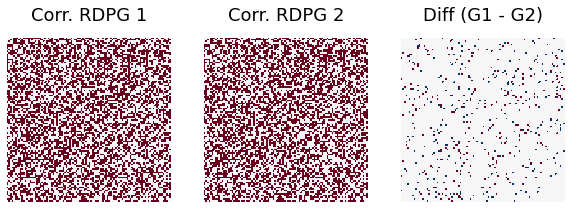

In [30]:
np.random.seed(12345)
r = 0.9

G1, G2 = rdpg_corr(X, Y, r, rescale=False, directed=False, loops=False)


fig, axs = plt.subplots(1, 3, figsize=(10, 5))
heatmap(G1, ax=axs[0], cbar=False, title="Corr. RDPG 1")
heatmap(G2, ax=axs[1], cbar=False, title="Corr. RDPG 2")
heatmap(G1 - G2, ax=axs[2], cbar=False, title="Diff (G1 - G2)")
ndim=G1.shape[0]
print("Difference rate when correlation =0.9 is ", np.sum(abs(G1-G2))/(ndim*ndim))

In [31]:
np.random.seed(12345)
X = np.random.dirichlet([10, 10], size=100)
Y = None
rlist=[]
for i in range(-5,10):
    g1,g2 = rdpg_corr(X, Y, i/10, rescale=False, directed=False, loops=False)
    ndim=g1.shape[0]
    rate=np.sum(abs(g1-g2))/(ndim*ndim)
    rlist.append(rate)

Text(0, 0.5, 'Difference rate')

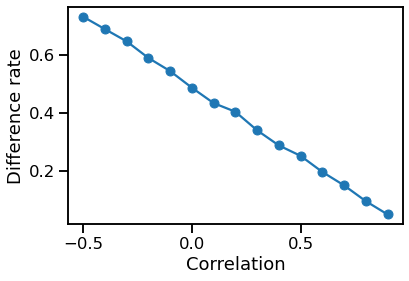

In [32]:
x_list = np.linspace(-0.5,0.9,15)
plt.plot(x_list,rlist,'o-')
plt.xlabel("Correlation")
plt.ylabel('Difference rate')